In [20]:
# IMPORTS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

In [21]:
# Load the dataset
file_path = 'dataset.csv'
data = pd.read_csv(file_path)

In [22]:
# Splitting the bytecode into individual bytes
data['bytecode_split'] = data['bytecode'].apply(lambda x: ' '.join(x[i:i+2] for i in range(0, len(x), 2)))

display(data)

,address,bytecode,is_vulnerable,bytecode_split
0,0x753D1c94E15e72A6f5371cA3f6Ce993c2A88BB0b,60605260361061575f35601c8063116157806311615780...,0,60 60 52 60 36 10 61 57 5f 35 60 1c 80 63 11 6...
1,0xd447d375A258c495a817CCebdECD25f01c77B253,60605260361061575f35601c8063116157806311615780...,0,60 60 52 60 36 10 61 57 5f 35 60 1c 80 63 11 6...
2,0xAB38Eb0A871b4c6cd1414332AADF4e7C9B442b9A,60605234801561576080fd5b5060361061576035601c80...,0,60 60 52 34 80 15 61 57 60 80 fd 5b 50 60 36 1...
3,0xc94d599d3ee37b6d5f86619bdecf78498c8e829a,60605260361061575f35601c8063116157806311615780...,0,60 60 52 60 36 10 61 57 5f 35 60 1c 80 63 11 6...
4,0x37cb680cb51492493035b9a27f5ebbfdc75b70b5,60605260361061575f35601c8063116157806311615780...,0,60 60 52 60 36 10 61 57 5f 35 60 1c 80 63 11 6...
...,...,...,...,...
1273,0xf1d9475dface556cbf27489fe39a871864c46a53,60605234801561575f80fd5b5060361061575f35601c80...,0,60 60 52 34 80 15 61 57 5f 80 fd 5b 50 60 36 1...
1274,0xD43c1Eb1Eb8c5290Af799144292492B75dA1c637,60605234801561576080fd5b5060361061576035601c80...,0,60 60 52 34 80 15 61 57 60 80 fd 5b 50 60 36 1...
1275,0xf1a2522996bcd80206b3d1ff7d6153745baf4fa7,60605260361061576035601c8063116157806311615780...,0,60 60 52 60 36 10 61 57 60 35 60 1c 80 63 11 6...
1276,0x01e799ebd5d11ddeea11e30466ce117b86726458,60605260361061576360600a6035041663811461578063...,1,60 60 52 60 36 10 61 57 63 60 60 0a 60 35 04 1...


In [23]:
# Initialize CountVectorizer to transform the hexadecimal bytes to numerical features
vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\b\w+\b', ngram_range=(1,2), min_df=1)

# Fit and transform the bytecode to create the feature set
X = vectorizer.fit_transform(data['bytecode_split'])
data["bytecode_split"].head()
X

<1278x17637 sparse matrix of type '<class 'numpy.int64'>'
	with 770197 stored elements in Compressed Sparse Row format>

In [24]:
# Set the target variable
y = data['is_vulnerable']

In [25]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Train an SVM model
model = svm.SVC(gamma='scale')  # 'gamma' is set to 'scale' to automatically adjust to the number of features
model.fit(X_train, y_train)

SVC()

In [27]:
# Predict the labels on the test set
y_pred = model.predict(X_test)

In [28]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [29]:
# Define a function to print the accuracy and classification report cleanly
def print_model_performance(accuracy, report):
    print(f"Accuracy: {accuracy:.2%}\n")
    print("Classification Report:")
    print(report)

# Call the function to display the performance
print_model_performance(accuracy, report)

Accuracy: 98.44%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       222
           1       1.00      0.88      0.94        34

    accuracy                           0.98       256
   macro avg       0.99      0.94      0.96       256
weighted avg       0.98      0.98      0.98       256



## Visualizations

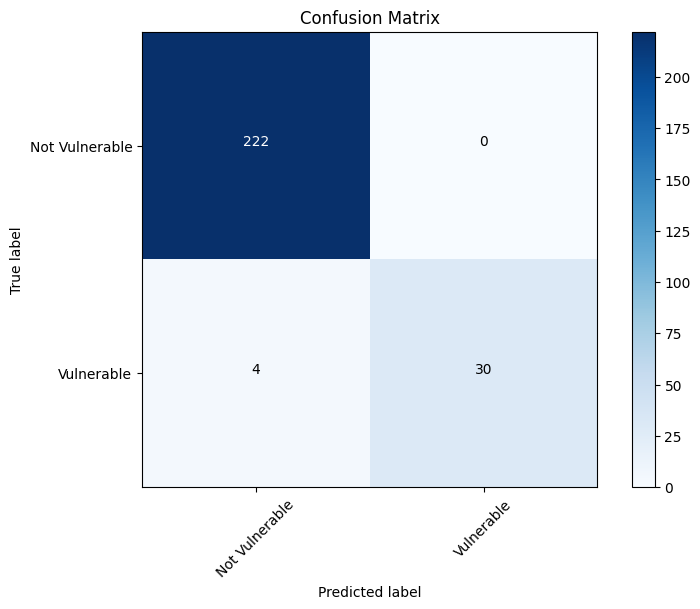

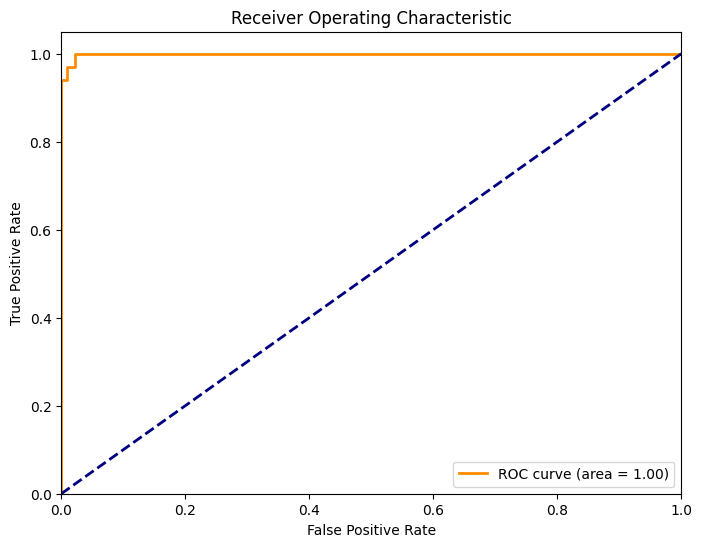

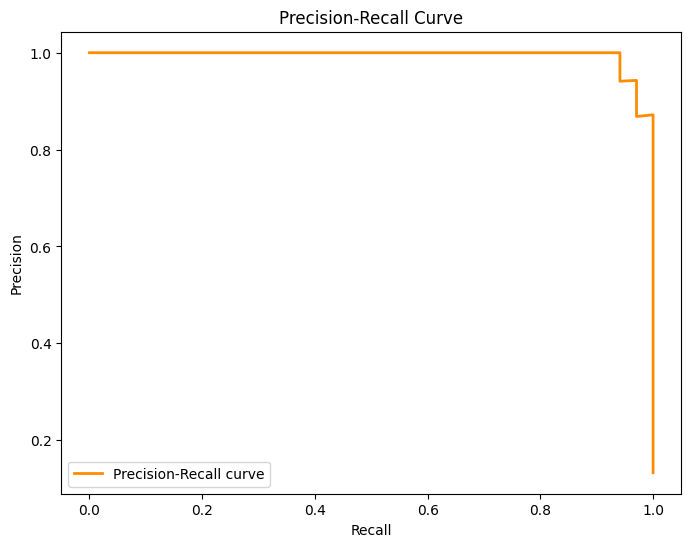

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from itertools import product
import numpy as np

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=['Not Vulnerable', 'Vulnerable'])
plt.show()

# Get decision function scores for ROC and Precision-Recall curves
y_score = model.decision_function(X_test)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


# Testing on new unseen data

In [31]:
# Data cleaning and vectorizing
testing_data = pd.read_csv("testdata.csv")
testing_data['bytecode_split'] = testing_data['bytecode'].apply(lambda x: ' '.join(x[i:i+2] for i in range(0, len(x), 2)))

vectorized_testing_data = vectorizer.transform(testing_data['bytecode_split'])
vectorized_testing_data

<232x17637 sparse matrix of type '<class 'numpy.int64'>'
	with 139267 stored elements in Compressed Sparse Row format>

In [32]:
# Doing presentations
test_predictions = model.predict(vectorized_testing_data)
original_labels = testing_data['is_vulnerable'].values  # Replace 'is_vulnerable' with the actual column name

# Compute the accuracy
accuracy = accuracy_score(original_labels, test_predictions)

# Generate a classification report
print(f"Accuracy: {accuracy*100}")
print(classification_report(original_labels, test_predictions, output_dict=True))
print(classification_report(original_labels, test_predictions))

Accuracy: 98.27586206896551
{'0': {'precision': 0.9804878048780488, 'recall': 1.0, 'f1-score': 0.9901477832512315, 'support': 201.0}, '1': {'precision': 1.0, 'recall': 0.8709677419354839, 'f1-score': 0.9310344827586207, 'support': 31.0}, 'accuracy': 0.9827586206896551, 'macro avg': {'precision': 0.9902439024390244, 'recall': 0.935483870967742, 'f1-score': 0.9605911330049262, 'support': 232.0}, 'weighted avg': {'precision': 0.9830950378469301, 'recall': 0.9827586206896551, 'f1-score': 0.9822490232716155, 'support': 232.0}}
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       201
           1       1.00      0.87      0.93        31

    accuracy                           0.98       232
   macro avg       0.99      0.94      0.96       232
weighted avg       0.98      0.98      0.98       232



# Saving the model to harddrive

In [33]:
# Saving the trained model to local storage
from joblib import dump, load

dump(model, 'svm_model.joblib')
dump(vectorizer, "svm_vectorizer.joblib")
vectorizer

CountVectorizer(ngram_range=(1, 2), token_pattern='\\b\\w+\\b')